In [3]:
array = [0,1,2,3,4]

mat = [10 ,10 ,2,3,13, 13, 42]
for i in range()

SyntaxError: ignored

In [4]:
pip install --upgrade mxnet gluoncv

     |████████████████████████████████| 68.7MB 59kB/s 
     |████████████████████████████████| 757kB 45.7MB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [5]:
from matplotlib import pyplot as plt
from gluoncv import model_zoo, data, utils
from gluoncv.data.transforms.pose import detector_to_simple_pose, heatmap_to_coord
import tensorflow as tf
import numpy as np


In [6]:
detector = model_zoo.get_model('yolo3_mobilenet1.0_coco', pretrained=True)
pose_net = model_zoo.get_model('simple_pose_resnet18_v1b', pretrained=True)
print(detector)
# Note that we can reset the classes of the detector to only include
# human, so that the NMS process is faster.

detector.reset_class(["person"], reuse_weights=['person'])

88993KB [00:01, 74235.99KB/s]                           
  0%|          | 0/55762 [00:00<?, ?KB/s]

55763KB [00:00, 83219.14KB/s]                           


YOLOV3(
  (_target_generator): YOLOV3TargetMerger(
    (_dynamic_target): YOLOV3DynamicTargetGeneratorSimple(
      (_batch_iou): BBoxBatchIOU(
        (_pre): BBoxSplit(
        
        )
      )
    )
  )
  (_loss): YOLOV3Loss(batch_axis=0, w=None)
  (stages): HybridSequential(
    (0): HybridSequential(
      (0): Conv2D(3 -> 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False, in_channels=32)
      (2): Activation(relu)
      (3): Conv2D(1 -> 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
      (4): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False, in_channels=32)
      (5): Activation(relu)
      (6): Conv2D(32 -> 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (7): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False, in_channels=64)
      (8): Activation(relu)
      (9

In [7]:
'''im_fname = utils.download('https://github.com/dmlc/web-data/blob/master/' +
                          'gluoncv/pose/soccer.png?raw=true',
                          path='soccer.png')'''
im_fname="/content/drive/My Drive/WIN_20200806_21_00_54_Pro.jpg"
x, img = data.transforms.presets.ssd.load_test(im_fname, short=512)
print('Shape of pre-processed image:', x.shape)

class_IDs, scores, bounding_boxs = detector(x)

Shape of pre-processed image: (1, 3, 512, 910)


In [ ]:
print(img.shape)
print(x.shape)
print(class_IDs.shape)
print(scores.shape)
print(bounding_boxs.shape)

In [ ]:
print(scores)

(512, 910, 3)
(1, 3, 512, 910)


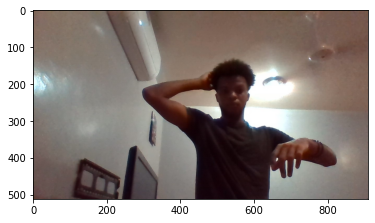

In [10]:
print(img.shape)
print(x.shape)
plt.imshow(img)

In [11]:
a = np.ones((512,605,3))

In [12]:
pose_input, upscale_bbox = detector_to_simple_pose(img, class_IDs, scores, bounding_boxs)

In [13]:
print(pose_input.shape)

(1, 3, 256, 192)


In [14]:
predicted_heatmap = pose_net(pose_input)
pred_coords, confidence = heatmap_to_coord(predicted_heatmap, upscale_bbox)

In [15]:
print(pred_coords.shape)
print(pred_coords[0,:,1])

(1, 17, 2)

[234.77077 213.97856 220.90929 220.90929 220.90929 338.73175 311.00885
 380.3161  227.84001 366.45465 200.11711 505.06927 505.06927 505.06927
 505.06927 193.18639 193.18639]
<NDArray 17 @cpu(0)>


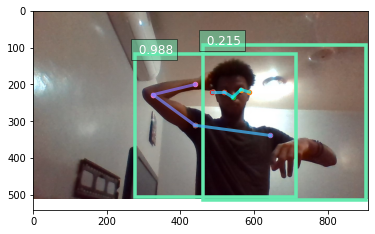

In [16]:
ax = utils.viz.plot_keypoints(img, pred_coords, confidence,
                              class_IDs, bounding_boxs, scores,
                              box_thresh=0.1, keypoint_thresh=0.5)
plt.show()

In [30]:
def mappingfunc (joints_cord ,img_shape,white=True):
  if(white):
    img = np.ones(img_shape)*255
  else:
    img = np.zeros(img_shape)

  for person in range (joints_cord.shape[0]): # in range (number of detected persons)  the shape is  (num_of_people , num_of_joints , 2)
    for joint_x,joint_y in np.array(joints_cord[person]):
      print(joint_x)
      print(joint_y)
      img[int(joint_x),int(joint_y)] = 0
  return img


In [31]:
test_img = mappingfunc(pred_coords,(700,700))

[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[
[542.0097]
<NDArray 1 @cpu(0)>]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]
[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[
[234.77077]
<NDArray 1 @cpu(0)>]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]


TypeError: ignored